### Data Preprocessing

---

In [1]:
import os

In [5]:
folderlist=os.listdir("../code/DataSet/")

In [6]:
folderlist

['invoices', 'receipts']

In [7]:
required_folders = ['invoices','receipts']

In [8]:
parent="../code/DataSet/"

In [9]:
import shutil

In [10]:
for x in folderlist:
  if x not in required_folders:
    path = os.path.join(parent, x) 
    #os.rmdir(path) 
    shutil.rmtree(path, ignore_errors=True)

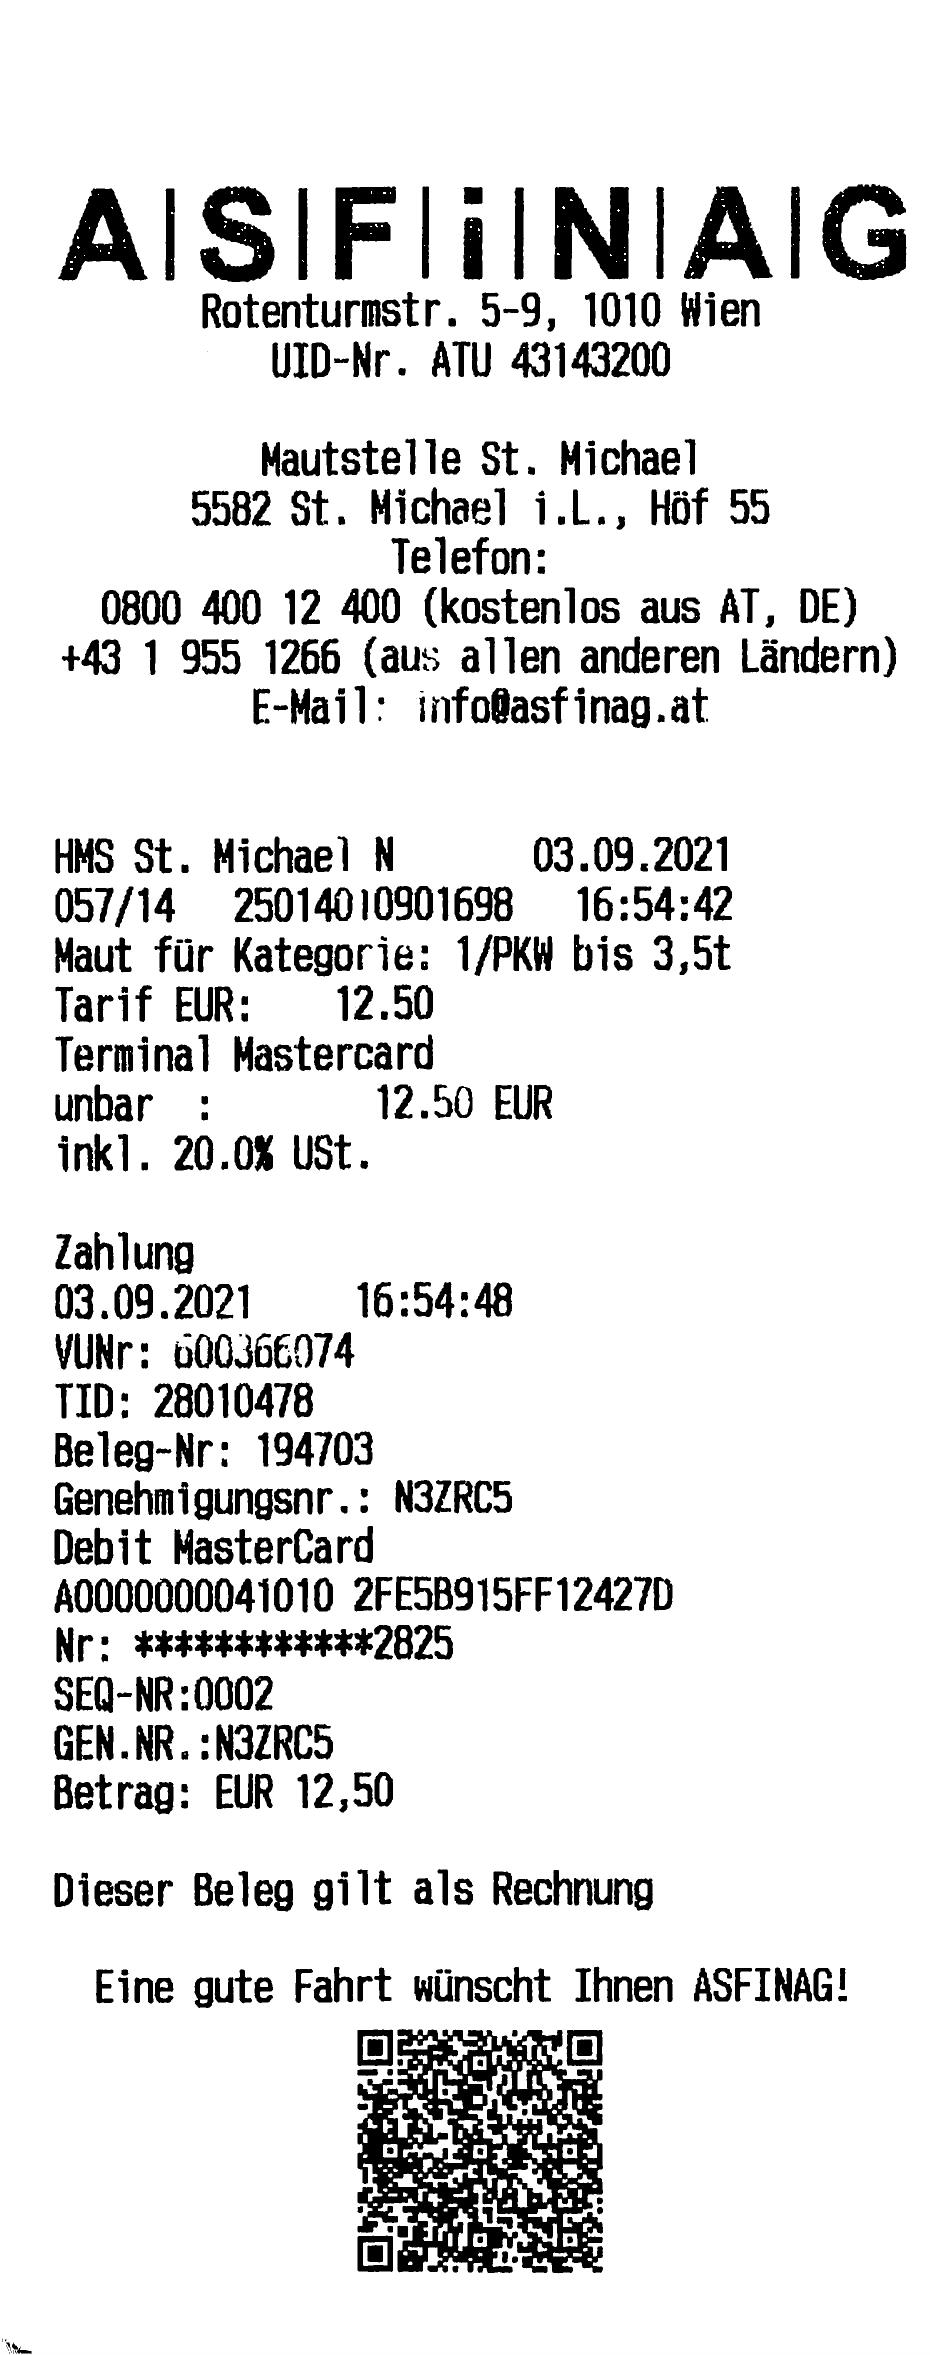

In [11]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("DataSet/receipts/2021/at/20210906_001_1.jpg")
#image = image.convert("RGB")
image

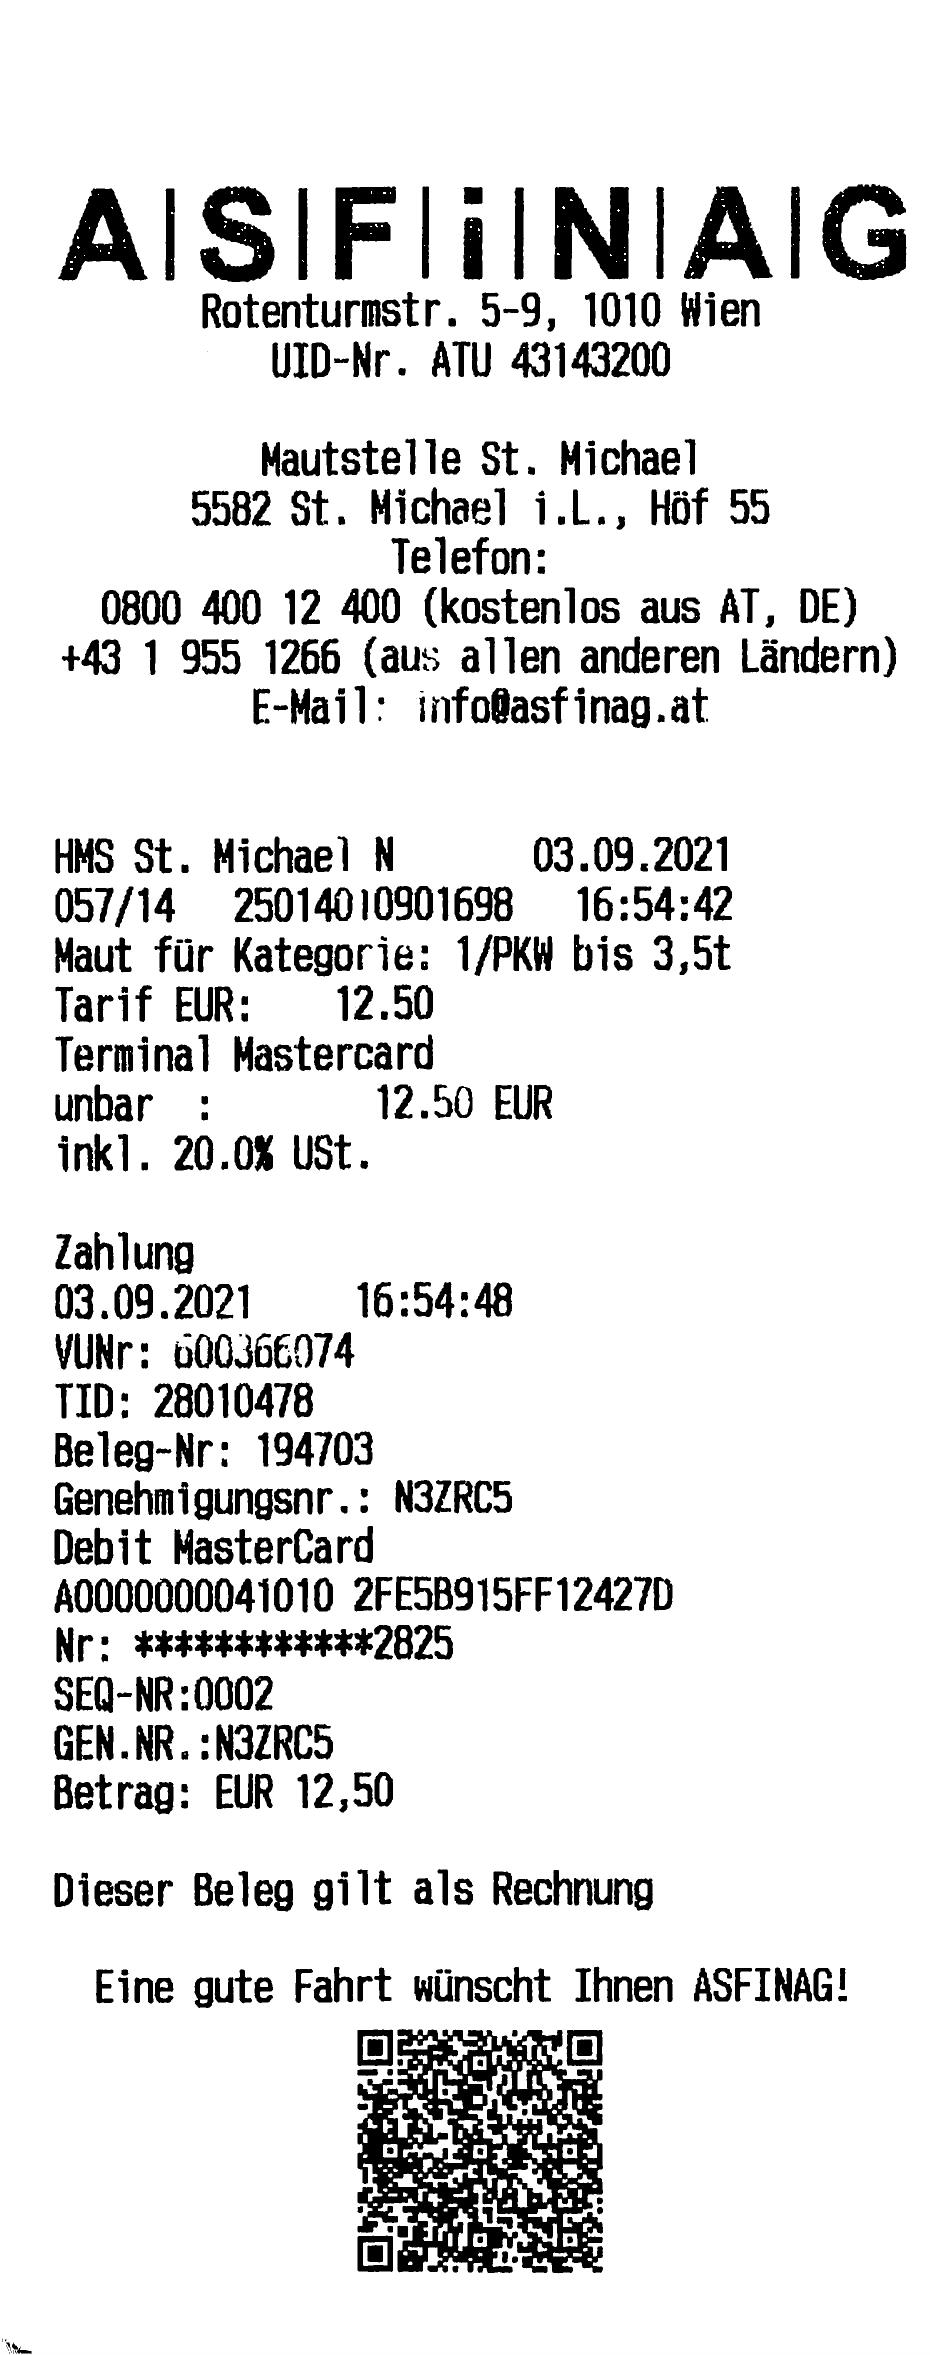

In [12]:
image = Image.open("DataSet/receipts/2021/at/20210906_001_1.jpg")
image = image.convert("RGB")
image

In [13]:
! sudo apt install tesseract-ocr
! pip install pytesseract

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
import pytesseract
import numpy as np
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

'AISIFIiINIAIG Rotenturmstr. 5-9, 1010 Wien UID-Nr. ATU 43149200 Mautstelle St. Michael 5582 St. Michael i.L., HOf 55 Telefon: 0800 400 12 400 (kostenlos aus AT, DE) +43 1.955 1266 (aus allen anderen Landern) E-Mail: infofasfinag.at HMS St. Michael N 03.09.2021 057/14 25014010901698 16:54:42 Maut fiir Kategorie: 1/PKW bis 3,5t Tarif EUR: 12.50 Terminal Mastercard unbar : 12.50 EUR ink]. 20.0% USt. Zahlung 03.09.2021 16:54:48 VUNr: 600306974 TID: 28010478 Beleg-Nr: 194703 Genehmigungsnr.: N3ZRC5 Debit MasterCard A0000000041010 2FE5B915FF12427D Nri eREEEEZB75 SEQ-NR :0002 GEN.NR. :N3ZRC5 Betrag: EUR 12,50 Dieser Beleg gilt als Rechnung Eine gute Fahrt wiinscht Ihnen ASFINAG!'

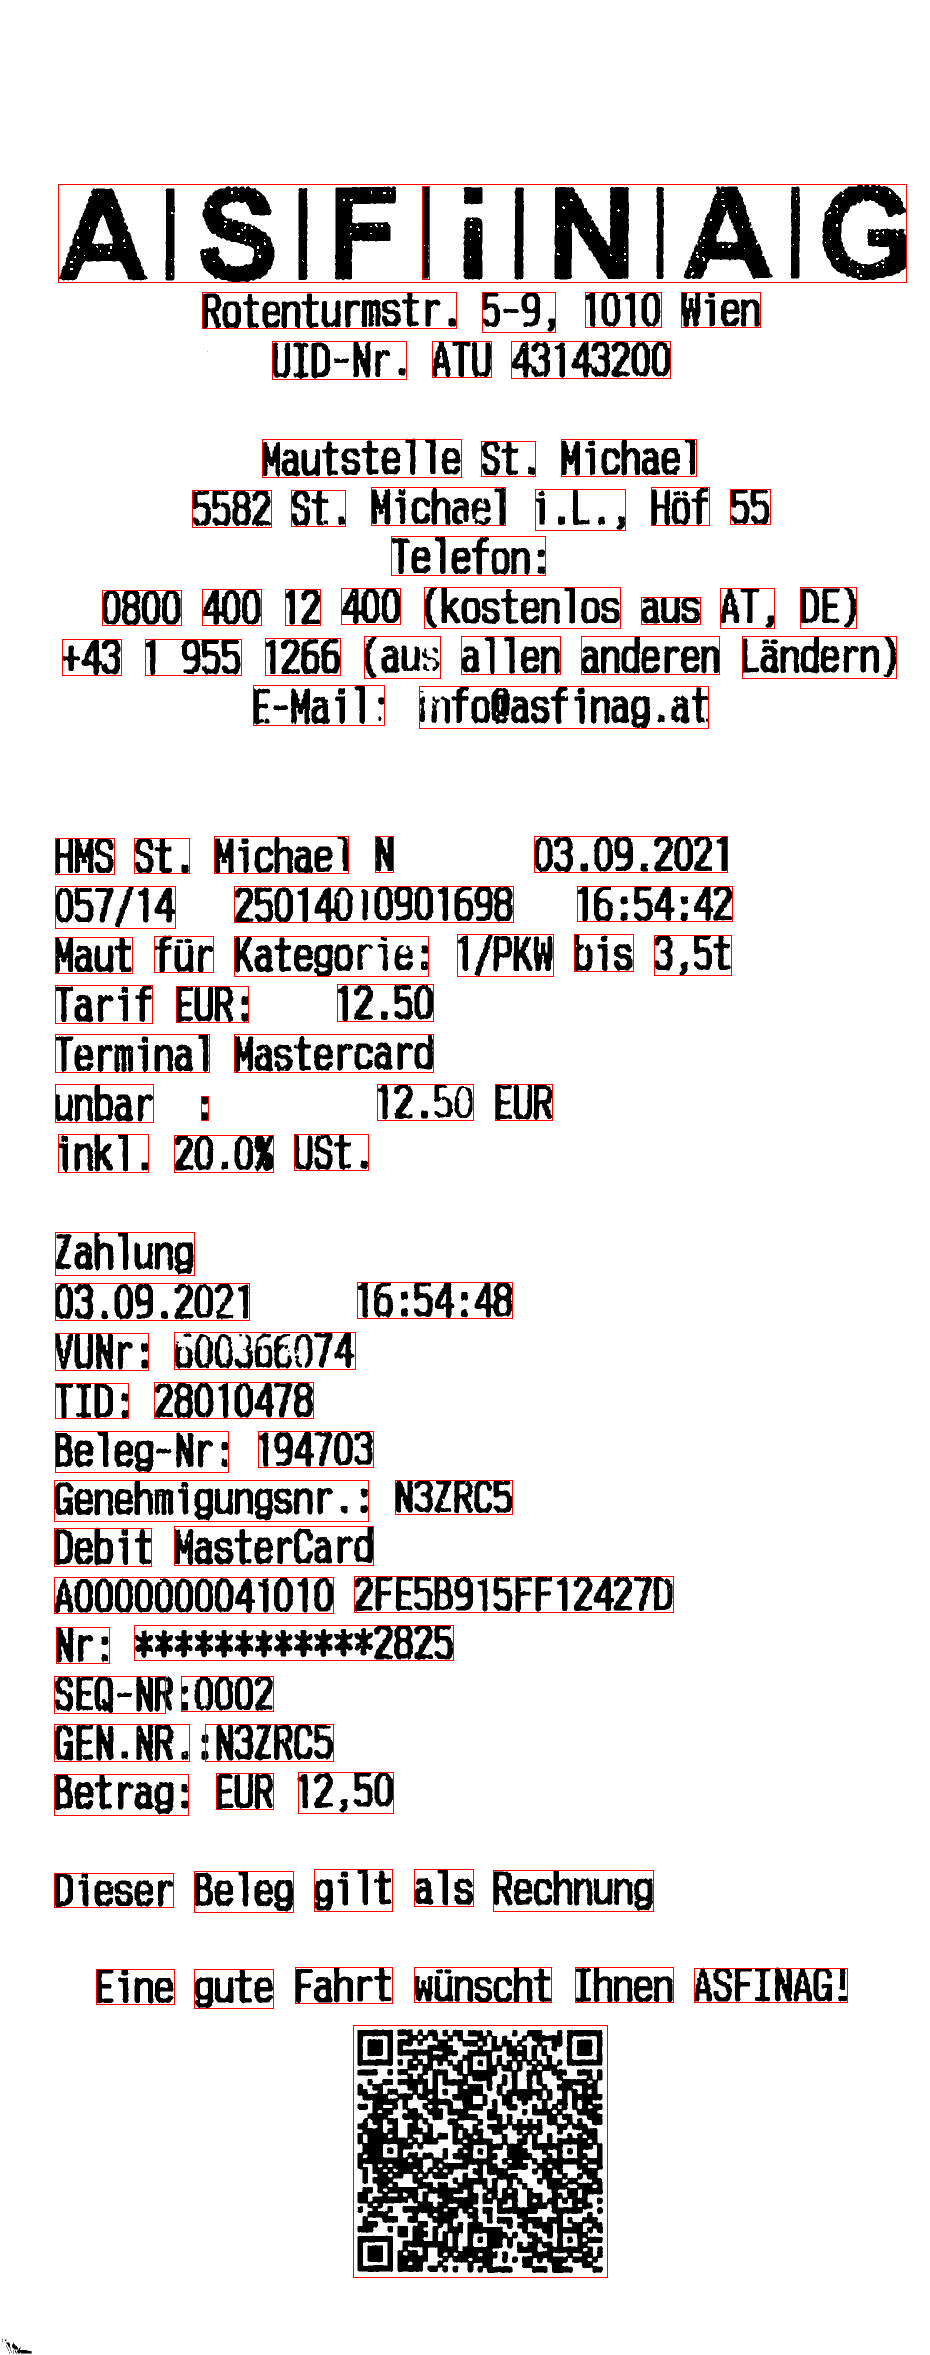

In [15]:
coordinates = ocr_df[['left', 'top', 'width', 'height']]
actual_boxes = []
for idx, row in coordinates.iterrows():
    x, y, w, h = tuple(row) # the row comes in (left, top, width, height) format
    actual_box = [x, y, x+w, y+h] # we turn it into (left, top, left+width, top+height) to get the actual box 
    actual_boxes.append(actual_box)

draw = ImageDraw.Draw(image, "RGB")
for box in actual_boxes:
  draw.rectangle(box, outline='red')

image

In [16]:
width, height = image.size

In [17]:
ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
float_cols = ocr_df.select_dtypes('float').columns
ocr_df = ocr_df.dropna().reset_index(drop=True)
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
ocr_df = ocr_df.dropna().reset_index(drop=True)

In [18]:
ocr_df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,5,1,1,1,1,1,682,293,78,34,97,Wien
1,5,1,2,1,1,1,686,293,9,15,67,q
2,5,1,3,1,1,1,656,293,5,19,30,}
3,5,1,3,1,2,1,655,313,6,14,9,}
4,5,1,4,1,1,1,586,293,69,34,97,1010
...,...,...,...,...,...,...,...,...,...,...,...,...
83,5,1,63,1,1,2,165,1365,141,108,36,0008
84,5,1,63,1,2,1,54,1724,185,38,59,GEN.
85,5,1,63,1,2,2,137,1720,30,50,14,NR
86,5,1,63,1,2,3,179,1720,13,50,14,J


In [19]:
words = list(ocr_df.text)

In [20]:
words

['Wien',
 'q',
 '}',
 '}',
 '1010',
 '-9',
 'IINIAIG',
 'nfo@asf',
 'inag.a',
 'aus',
 'allen',
 'anderen',
 'Landern)',
 'E-Mail:',
 'mstr',
 'UID-Nr',
 'J',
 'ATU',
 '43149200',
 'Mautstelle',
 'St',
 'Michael',
 '5582',
 'Stl',
 'Michael',
 'i.L.,',
 'Hof',
 '55',
 '0800',
 '400',
 '12',
 '400',
 '(kostenlos',
 'aus',
 'AT)',
 'DE)',
 'AISIF',
 '+43',
 '1959',
 '1266',
 're',
 'uf',
 'FF',
 '124270',
 '12.50',
 'Eine',
 'gute',
 'Fahrt',
 'wiinscht',
 'Ihnen',
 'ASFINAG!',
 'Dieser',
 'Beleg',
 'gilt',
 'als',
 'Rechnung',
 'ert',
 'Fon',
 'Categorie:',
 'aKa',
 'bis',
 'fart',
 'FUR',
 ':',
 'fence',
 'tags',
 'N3ZRC5',
 'Debit',
 'Ma',
 'Nr',
 'eeeeREREEEEEZB75',
 'SEQ-NR:',
 '0002',
 'ink1.',
 '20.08',
 '20.0%',
 'UST,',
 'Betrag:',
 'EUR',
 '12,50',
 'A0000000041010',
 '2',
 'I:',
 '0008',
 'GEN.',
 'NR',
 'J',
 '{NSZRCS']

In [21]:
import cv2 as cv
import math
from scipy import ndimage
import pytesseract as pt
import pandas as pd
import os 

In [22]:
count=0
df = pd.DataFrame(columns=['text', 'doc_type'])
kernel= np.ones((1,1),np.uint8)

In [20]:
os.path.basename(os.path.dirname("/content/docs-sm/form/0000980962.jpg"))

'form'

In [23]:
os.path.basename(os.path.dirname("DataSet/receipts/2021/at\\20210906_001_1.jpg"))

'at'

In [24]:
for subdir, dirs, files in os.walk("DataSet"):
  print(subdir)

DataSet
DataSet\invoices
DataSet\invoices\2017
DataSet\invoices\2017\de
DataSet\invoices\2017\de\public transport
DataSet\invoices\2018
DataSet\invoices\2018\ca
DataSet\invoices\2018\ca\hotel
DataSet\invoices\2018\ca\public transport
DataSet\invoices\2018\ca\restaurant
DataSet\invoices\2018\ca\retail
DataSet\invoices\2018\ca\tourist attraction
DataSet\invoices\2018\cn
DataSet\invoices\2018\cn\cafe
DataSet\invoices\2018\cn\hotel
DataSet\invoices\2018\cn\public transport
DataSet\invoices\2018\cn\restaurant
DataSet\invoices\2018\cn\retail
DataSet\invoices\2018\cn\tourist attraction
DataSet\invoices\2018\de
DataSet\invoices\2018\de\cafe
DataSet\invoices\2018\de\hotel
DataSet\invoices\2018\de\public transport
DataSet\invoices\2018\de\restaurant
DataSet\invoices\2018\de\retail
DataSet\invoices\2018\fr
DataSet\invoices\2018\fr\public transport
DataSet\invoices\2018\fr\restaurant
DataSet\invoices\2018\us
DataSet\invoices\2018\us\hotel
DataSet\invoices\2018\us\public transport
DataSet\invoices\

In [64]:
for subdir, dirs, files in os.walk("DataSet"):
    for file in files:
        im = Image.open(subdir+"/"+file)
        img=np.asarray(im)
        # #to convert into gray scale
        # img=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        #for tilted images
        img_edges = cv.Canny(img, 100, 100, apertureSize=3)
        lines = cv.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)
        angles = []
        if lines is not None:
            for x1, y1, x2, y2 in lines[0]:
                cv.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
                angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
                angles.append(angle)
            median_angle = np.median(angles)
            if (median_angle != 0) :
                img = ndimage.rotate(img, median_angle)
        #to read text using tesseract
        result=pt.image_to_data(img, output_type='data.frame')
        #to remove words with less confidence
        result = result[result.conf > 75]
        result_mean = result["conf"].mean()
        #to apply image preprocessing
        ret,thresh1 = cv.threshold(img,110,255,cv.THRESH_BINARY)
        blur = cv.bilateralFilter(thresh1,9,100,100)
        result_after_preproc = pt.image_to_data(blur, output_type='data.frame')
        result_after_preproc = result_after_preproc[result_after_preproc.conf > 75]
        result_after_preproc_mean= result_after_preproc["conf"].mean()
        if (result_mean<result_after_preproc_mean):
            result=result_after_preproc
        #to keep track of progress
        count=count+1
        print(count)
        #to extract file name and set it as class
        path=os.path.dirname(subdir+"/"+file)
        #joining words to form sentences
        text=''
        for a in result['text']:
            text=text+' '+ str(a)
        df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)

2


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


3


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


4


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


5


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


6


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


7


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


8


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


9


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


10


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


11


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


12


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


13


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


14


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


15


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


16


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


17


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


18


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


19


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


20


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


21


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


22


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


23


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


24


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


25


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


26


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


27


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


28


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


29


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


30


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


31


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


32


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


33


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


34


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


35


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


36


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


37


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


38


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


39


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


40


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


41


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


42


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


43


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


44


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


45


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


46


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


47


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


48


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


49


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


50


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


51


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


52


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


53


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


54


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


55


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


56


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


57


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


58


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


59


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


60


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


61


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


62


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


63


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


64


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


65


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


66


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


67


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


68


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


69


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


70


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


71


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


72


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


73


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


74


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


75


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


76


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


77


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


78


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


79


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


80


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


81


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


82


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


83


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


84


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


85


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


86


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


87


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


88


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


89


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


90


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


91


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


92


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


93


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


94


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


95


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


96


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


97


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


98


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


99


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


100


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


101


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


102


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


103


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


104


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


105


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


106


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


107


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


108


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


109


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


110


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


111


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


112


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


113


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


114


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


115


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


116


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


117


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


118


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


119


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


120


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


121


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


122


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


123


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


124


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


125


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


126


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


127


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


128


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


129


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


130


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


131


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


132


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


133


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


134


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


135


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


136


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


137


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


138


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


139


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


140


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


141


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


142


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


143


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


144


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


145


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


146


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


147


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


148


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


149


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


150


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


151


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


152


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


153


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


154


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


155


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


156


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


157


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


158


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


159


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


160


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


161


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


162


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


163


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


164


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


165


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


166


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


167


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


168


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


169


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


170


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


171


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


172


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


173


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


174


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


175


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


176


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


177


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


178


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


179


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


180


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


181


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


182


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


183


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


184


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


185


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


186


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


187


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


188


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


189


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


190


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


191


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


192


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


193


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


194


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


195


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


196


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


197


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


198


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


199


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


200


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


201


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


202


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


203


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


204


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


205


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


206


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


207


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


208


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


209


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


210


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


211


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


212


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


213


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


214


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


215


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


216


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


217


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


218


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


219


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


220


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


221


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


222


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


223


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


224


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


225


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


226


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


227


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


228


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


229


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


230


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


231


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


232


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


233


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


234


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


235


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


236


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


237


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


238


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


239


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


240


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


241


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


242


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


243


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


244


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


245


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


246


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


247


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


248


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


249


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


250


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


251


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


252


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


253


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


254


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


255


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


256


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


257


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


258


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


259


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


260


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


261


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


262


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


263


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


264


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


265


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


266


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


267


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


268


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


269


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


270


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


271


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


272


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


273


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


274


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


275


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


276


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


277


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


278


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


279


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


280


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


281


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


282


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


283


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


284


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


285


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


286


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


287


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


288


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


289


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


290


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


291


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


292


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


293


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


294


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


295


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


296


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


297


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


298


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


299


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


300


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


301


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


302


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


303


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


304


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


305


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


306


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


307


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


308


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


309


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


310


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


311


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


312


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


313


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


314


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


315


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


316


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


317


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


318


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


319


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


320


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


321


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


322


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


323


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


324


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


325


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


326


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


327


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


328


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


329


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


330


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


331


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


332


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


333


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


334


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


335


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


336


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


337


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


338


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


339


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


340


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


341


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


342


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


343


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


344


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


345


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


346


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


347


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


348


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


349


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


350


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


351


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


352


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


353


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


354


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


355


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


356


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


357


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


358


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


359


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


360


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


361


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


362


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


363


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


364


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


365


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


366


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


367


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


368


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


369


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


370


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


371


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


372


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


373


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


374


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


375


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


376


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


377


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


378


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


379


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


380


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


381


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


382


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


383


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


384


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


385


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


386


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


387


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


388


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


389


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


390


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


391


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


392


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


393


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


394


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


395


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


396


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


397


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


398


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


399


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


400


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


401


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


402


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


403


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


404


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


405


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


406


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


407


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


408


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


409


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


410


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


411


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


412


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


413


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


414


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


415


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


416


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


417


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


418


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


419


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


420


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


421


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


422


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


423


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


424


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


425


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


426


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


427


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


428


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


429


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


430


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


431


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


432


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


433


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


434


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


435


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


436


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


437


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


438


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


439


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


440


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


441


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


442


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


443


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


444


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


445


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


446


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


447


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


448


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


449


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


450


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


451


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


452


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


453


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


454


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


455


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


456


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


457


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


458


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


459


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


460


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


461


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


462


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


463


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


464


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


465


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


466


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


467


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


468


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


469


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


470


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


471


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


472


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


473


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


474


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


475


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


476


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


477


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


478


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


479


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


480


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


481


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


482


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


483


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


484


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


485


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


486


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


487


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


488


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


489


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


490


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


491


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


492


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


493


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


494


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


495


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


496


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


497


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


498


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


499


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


500


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


501


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


502


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


503


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


504


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


505


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


506


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


507


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


508


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


509


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


510


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


511


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


512


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


513


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


514


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


515


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


516


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


517


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


518


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


519


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


520


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


521


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


522


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


523


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


524


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


525


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


526


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


527


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


528


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


529


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


530


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


531


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


532


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


533


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


534


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


535


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


536


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


537


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


538


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


539


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


540


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


541


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


542


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


543


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


544


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


545


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


546


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


547


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


548


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


549


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


550


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


551


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


552


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


553


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


554


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


555


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


556


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


557


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


558


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


559


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


560


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


561


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


562


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


563


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


564


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


565


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


566


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


567


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


568


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


569


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


570


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


571


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


572


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


573


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


574


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


575


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


576


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


577


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


578


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


579


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


580


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


581


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


582


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


583


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


584


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


585


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


586


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


587


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


588


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


589


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


590


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


591


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


592


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


593


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


594


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


595


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


596


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


597


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


598


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


599


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


600


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


601


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


602


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


603


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


604


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


605


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


606


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


607


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


608


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


609


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


610


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


611


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


612


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


613


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


614


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


615


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


616


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


617


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


618


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


619


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


620


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


621


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


622


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


623


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


624


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


625


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


626


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


627


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


628


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


629


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


630


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


631


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


632


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


633


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


634


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


635


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


636


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


637


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


638


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


639


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


640


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


641


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


642


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


643


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


644


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


645


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


646


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


647


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


648


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


649


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


650


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


651


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


652


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


653


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


654


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


655


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


656


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


657


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


658


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


659


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


660


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


661


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


662


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


663


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


664


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


665


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


666


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


667


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


668


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


669


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


670


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


671


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


672


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


673


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


674


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


675


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


676


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


677


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


678


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


679


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


680


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


681


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


682


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


683


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


684


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


685


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


686


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


687


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


688


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


689


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


690


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


691


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


692


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


693


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


694


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


695


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


696


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


697


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


698


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


699


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


700


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


701


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


702


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


703


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


704


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


705


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


706


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


707


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


708


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


709


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


710


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


711


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


712


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


713


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


714


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


715


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


716


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


717


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


718


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


719


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


720


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


721


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


722


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


723


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


724


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


725


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


726


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


727


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


728


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


729


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


730


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


731


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


732


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


733


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


734


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


735


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


736


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


737


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


738


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


739


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


740


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


741


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


742


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


743


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


744


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


745


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


746


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


747


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


748


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


749


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


750


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


751


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


752


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


753


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


754


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


755


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


756


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


757


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


758


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


759


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


760


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


761


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


762


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


763


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


764


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


765


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


766


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


767


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


768


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


769


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


770


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


771


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


772


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


773


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


774


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


775


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


776


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


777


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


778


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


779


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


780


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


781


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


782


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


783


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


784


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


785


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


786


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


787


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


788


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


789


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


790


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


791


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


792


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


793


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


794


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


795


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


796


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


797


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


798


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


799


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


800


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


801


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


802


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


803


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


804


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


805


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


806


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


807


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


808


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


809


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


810


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


811


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


812


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


813


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


814


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


815


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


816


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


817


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


818


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


819


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


820


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


821


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


822


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


823


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


824


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


825


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


826


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


827


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


828


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


829


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


830


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


831


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


832


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


833


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


834


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


835


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


836


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


837


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


838


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


839


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


840


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


841


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


842


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


843


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


844


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


845


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


846


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


847


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


848


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


849


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


850


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


851


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


852


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


853


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


854


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


855


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


856


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


857


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


858


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


859


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


860


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


861


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


862


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


863


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


864


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


865


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


866


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


867


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


868


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


869


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


870


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


871


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


872


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


873


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


874


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


875


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


876


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


877


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


878


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


879


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


880


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


881


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


882


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


883


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


884


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


885


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


886


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


887


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


888


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


889


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


890


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


891


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


892


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


893


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


894


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


895


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


896


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


897


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


898


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


899


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


900


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


901


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


902


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


903


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


904


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


905


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


906


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


907


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


908


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


909


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


910


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


911


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


912


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


913


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


914


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


915


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


916


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


917


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


918


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


919


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


920


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


921


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


922


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


923


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


924


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


925


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


926


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


927


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


928


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


929


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


930


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


931


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


932


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


933


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


934


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


935


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


936


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


937


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


938


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


939


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


940


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


941


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


942


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


943


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


944


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


945


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


946


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


947


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


948


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


949


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


950


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


951


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


952


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


953


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


954


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


955


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


956


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


957


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


958


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


959


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


960


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


961


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


962


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


963


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


964


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


965


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


966


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


967


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


968


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


969


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


970


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


971


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


972


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


973


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


974


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


975


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


976


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


977


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


978


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


979


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


980


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


981


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


982


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


983


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


984


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


985


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


986


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


987


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


988


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


989


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


990


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


991


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


992


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


993


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


994


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


995


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


996


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


997


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


998


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


999


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1000


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1001


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1002


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1003


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1004


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1005


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1006


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1007


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1008


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1009


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1010


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1011


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1012


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1013


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1014


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1015


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1016


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1017


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1018


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1019


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1020


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1021


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1022


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1023


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1024


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1025


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1026


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1027


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1028


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1029


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1030


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1031


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1032


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1033


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1034


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1035


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1036


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1037


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1038


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1039


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1040


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1041


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1042


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1043


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1044


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1045


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1046


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1047


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1048


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1049


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1050


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1051


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1052


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1053


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1054


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1055


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1056


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1057


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1058


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1059


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1060


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1061


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1062


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1063


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1064


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1065


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1066


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1067


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1068


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1069


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1070


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1071


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1072


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1073


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1074


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1075


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1076


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1077


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1078


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1079


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1080


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1081


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1082


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1083


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1084


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1085


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1086


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1087


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1088


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1089


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1090


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1091


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1092


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1093


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1094


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1095


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1096


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1097


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1098


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1099


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1100


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1101


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1102


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1103


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1104


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1105


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1106


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1107


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1108


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1109


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1110


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1111


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1112


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1113


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1114


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1115


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1116


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1117


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1118


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1119


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1120


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1121


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1122


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1123


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1124


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1125


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1126


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1127


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1128


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1129


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1130


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1131


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1132


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1133


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1134


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1135


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1136


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1137


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1138


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1139


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1140


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1141


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1142


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1143


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1144


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1145


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1146


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1147


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1148


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1149


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1150


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1151


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1152


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1153


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1154


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1155


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1156


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1157


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1158


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1159


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1160


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1161


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1162


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1163


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1164


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1165


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1166


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1167


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1168


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1169


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1170


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1171


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1172


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1173


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1174


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1175


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1176


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1177


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1178


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1179


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1180


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1181


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1182


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1183


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1184


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1185


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1186


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1187


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1188


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1189


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1190


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1191


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1192


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1193


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1194


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1195


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1196


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1197


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1198


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1199


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1200


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1201


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1202


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1203


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1204


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1205


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1206


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1207


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1208


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1209


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1210


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1211


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1212


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1213


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1214


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1215


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1216


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1217


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1218


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1219


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1220


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1221


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1222


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1223


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1224


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1225


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1226


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1227


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1228


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1229


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1230


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1231


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1232


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1233


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1234


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1235


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1236


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1237


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1238


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1239


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1240


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1241


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1242


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1243


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1244


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1245


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1246


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1247


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1248


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1249


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1250


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1251


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1252


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1253


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1254


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1255


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1256


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1257


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1258


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1259


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1260


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1261


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1262


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1263


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1264


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1265


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1266


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1267


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1268


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1269


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1270


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1271


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1272


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1273


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1274


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1275


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1276


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1277


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1278


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1279


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1280


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1281


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1282


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1283


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1284


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1285


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1286


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1287


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1288


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1289


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1290


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1291


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1292


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1293


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1294


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1295


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1296


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1297


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1298


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1299


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1300


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1301


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1302


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1303


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1304


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1305


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1306


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1307


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1308


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1309


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1310


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1311


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1312


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1313


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1314


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1315


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1316


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1317


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1318


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1319


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1320


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1321


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1322


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1323


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1324


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1325


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1326


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1327


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1328


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1329


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1330


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1331


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1332


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1333


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1334


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1335


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1336


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1337


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1338


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1339


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1340


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1341


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1342


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1343


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1344


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1345


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1346


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1347


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1348


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1349


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1350


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1351


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1352


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1353


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1354


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1355


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1356


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1357


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1358


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1359


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1360


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1361


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1362


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1363


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1364


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1365


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1366


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1367


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1368


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1369


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1370


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1371


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1372


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1373


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1374


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1375


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1376


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1377


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1378


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1379


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1380


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1381


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1382


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1383


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1384


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1385


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1386


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1387


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1388


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1389


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1390


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1391


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1392


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1393


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1394


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1395


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1396


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1397


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1398


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1399


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1400


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1401


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1402


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1403


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1404


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1405


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1406


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1407


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1408


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1409


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1410


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1411


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1412


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1413


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1414


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1415


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1416


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1417


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1418


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1419


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1420


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1421


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1422


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1423


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1424


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1425


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1426


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1427


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1428


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1429


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1430


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1431


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1432


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1433


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1434


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1435


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1436


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1437


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1438


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1439


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1440


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1441


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1442


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1443


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1444


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1445


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1446


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1447


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1448


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1449


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1450


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1451


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1452


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1453


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1454


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1455


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1456


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1457


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1458


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1459


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1460


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1461


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1462


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1463


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1464


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1465


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1466


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1467


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1468


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1469


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1470


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1471


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1472


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1473


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1474


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1475


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1476


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1477


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1478


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1479


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1480


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1481


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1482


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1483


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1484


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1485


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1486


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1487


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1488


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1489


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1490


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1491


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1492


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1493


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1494


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1495


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1496


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1497


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1498


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1499


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1500


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1501


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1502


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1503


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1504


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1505


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1506


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1507


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1508


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1509


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1510


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1511


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1512


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1513


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1514


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1515


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1516


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1517


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1518


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1519


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1520


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1521


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1522


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1523


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1524


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1525


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1526


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1527


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1528


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1529


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1530


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1531


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1532


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1533


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1534


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1535


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1536


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1537


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1538


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1539


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1540


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1541


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1542


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1543


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1544


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1545


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1546


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1547


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1548


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1549


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1550


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1551


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1552


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1553


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1554


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1555


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1556


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1557


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1558


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1559


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1560


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1561


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1562


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1563


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1564


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1565


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1566


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1567


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1568


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1569


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1570


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1571


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1572


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1573


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1574


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1575


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1576


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1577


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1578


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1579


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1580


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1581


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1582


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1583


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1584


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1585


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1586


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1587


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1588


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1589


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1590


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1591


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1592


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1593


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1594


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1595


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1596


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1597


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1598


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1599


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1600


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1601


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1602


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1603


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1604


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1605


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1606


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1607


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1608


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1609


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1610


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1611


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1612


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1613


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1614


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1615


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1616


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1617


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1618


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1619


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1620


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1621


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1622


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1623


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1624


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1625


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1626


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1627


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1628


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1629


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1630


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1631


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1632


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1633


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1634


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1635


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1636


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1637


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1638


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1639


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1640


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1641


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1642


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1643


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1644


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1645


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1646


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1647


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1648


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1649


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1650


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1651


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1652


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1653


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1654


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1655


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1656


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1657


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1658


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1659


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1660


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1661


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1662


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1663


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1664


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1665


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1666


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1667


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1668


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1669


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1670


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1671


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1672


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1673


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1674


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1675


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1676


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1677


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1678


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1679


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1680


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1681


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1682


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1683


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


1684


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\2495128169.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'text': text, 'doc_type': os.path.basename(path)}, ignore_index=True)


In [68]:
df.to_csv ('df1.csv', encoding='utf-8', index = None, header=True)

In [70]:
df1 = pd.read_csv('df1.csv')
df1.head()

,text,doc_type
0,tan woon yann DAYA) CASH BEL...,images
1,tan woon yann,images
2,"tan woon yann KEMBANGAN, TESCO TERBAU)...",images
3,tan woon yann EN ERPRI...,images
4,tan woon yann,images


In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2309 entries, 0 to 2308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2297 non-null   object
 1   doc_type  2309 non-null   object
dtypes: object(2)
memory usage: 36.2+ KB


In [29]:
import shutil

In [37]:
shutil.copy("df1.csv", "doc-classifier-csv/df.csv")

'doc-classifier-csv/df.csv'

Load model for nlp using spacy

In [30]:
! python -m spacy download en_core_web_sm

     -------------------------------------- 12.8/12.8 MB 501.0 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [72]:
import spacy
from spacy import displacy 
from  spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
import en_core_web_sm
import string
import nltk

In [73]:
nlp = spacy.load('en_core_web_sm')

In [74]:
stopwords = list(STOP_WORDS)
print(stopwords[:100])

['off', 'thru', 'last', 'could', 'give', 'yours', 'himself', 'made', 're', 'such', 'else', 'per', 'meanwhile', 'several', 'everything', 'who', 'hereafter', 'whereupon', 'somehow', 'nowhere', 'until', 'much', '‘ve', 'now', 'so', 'sometimes', 'can', 'next', 'seeming', 'alone', 'amount', 'been', 'herein', '’ll', 'both', 'after', 'show', 'even', 'up', 'under', 'become', 'though', 'whom', 'about', 'ours', 'used', 'around', 'any', 'something', 'n‘t', 'without', 'less', 'too', 'we', 'against', 'throughout', 'back', 'if', 'together', 'formerly', 'where', 'above', 'than', 'amongst', 'when', 'sometime', 'during', 'side', 'bottom', 'from', 'hereupon', 'often', 'nobody', 'only', 'on', '‘m', 'doing', 'full', 'one', 'seemed', 'nor', 'further', 'will', 'already', 'most', 'down', 'everyone', 'the', 'wherever', 'ten', 'and', 'call', 'via', 'across', 'five', 'many', 'front', 'no', 'really', 'neither']


In [75]:
# Remove / and - from punctuations for dates
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Function to remove stopwords, punctuations and tokanize

In [76]:
# Function to tokenise the text
def tokeniser(sentence):
    
    # Process the text
    doc = nlp(sentence)

    # Rule 1
    # Convert tokens to lemma form for all except '-PRON-'
    # Remember (from SpaCy introduction) : Tokens like I, my, me were represented as '-PRON-' by lemma attribute
    tokens = [ token.lemma_.lower().strip() if token.lemma_ != "-PRON-" else token.lower_ for token in doc ]

    # Rule 2
    # Remove stop words and punctuation
    tokens = [ token for token in tokens if token not in stopwords and token not in punctuations ]
    
    return tokens

Vectorisation using sklearn tfidf

In [77]:
tfvectorizer = TfidfVectorizer(tokenizer = tokeniser)

Train-test split

In [78]:
df1.shape

(2309, 2)

In [79]:
df1.isna().sum()

text        12
doc_type     0
dtype: int64

In [80]:
df1.dropna(inplace=True)

In [81]:
df1.shape

(2297, 2)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split( df1['text'], df1['doc_type'], 
                                                    test_size = 0.2, random_state = 678)

### Create machine learning pipe-line

<b>Naive Bayes & TF-IDF<b>

Build a Classifier Object

In [84]:
from sklearn.naive_bayes import MultinomialNB

In [85]:
classifier_NB = MultinomialNB()

In [86]:
from sklearn.pipeline import Pipeline

In [87]:
# Create the  pipeline to clean, tokenize, vectorize, and classify using"Count Vectorizor"
# Multiple models can be added to the Pipeline object to be executed in sequence.
model_pipe_NB = Pipeline( [ ('vectorizer', tfvectorizer), 
                         ('classifier', classifier_NB) ] )

Fit the model

In [88]:
model_pipe_NB.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokeniser at 0x000002730FC07C10>)),
                ('classifier', MultinomialNB())])

Export model for future use

In [89]:
import pickle

In [90]:
filename = 'NB_model_5cat_data.sav'
pickle.dump(model_pipe_NB, open(filename, 'wb'))

In [91]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

Predict on test data

In [92]:
preds = model_pipe_NB.predict(X_test)

In [93]:
preds[:10]

array(['restaurant', 'fr', 'fr', 'fr', 'images', 'images', 'images', 'fr',
       'de', 'images'], dtype='<U18')

In [94]:
X_test[:10]

1208     JIM BLOCK DAS HAMBUAGER ORIGINAL Jim Block Re...
1878     GRILL ISTAMBUL SARL FELINDA 77 RUE DE BEZONS ...
1837     C&A Modas SLU C/ Valportillo I N°13 Madrid 28...
1537                             : 2 90,00 EUR       K...
435      CONFECTIUNERY SDN BHD Jalan Sutera Tanjung 8/...
571         SUSHI - MAHKOTA CHERAS MIZU SDN. BHD. (124...
787                                                   a  
2086       JULES 99 BIS RUE ORDENER 75018 PARIS TEL: O...
1674         dm-drogerie markt 4 04109 10.11.2021 17:4...
29       3-1707067 (481500-M) HARDWARE SDN BHD JALAN P...
Name: text, dtype: object

In [95]:
y_test[:10]

1208       restaurant
1878               fr
1837               es
1537    miscellaneous
435            images
571            images
787        restaurant
2086               fr
1674               de
29             images
Name: doc_type, dtype: object

Compute accuracy

In [96]:
# Accuracy
print("Train Accuracy: ", model_pipe_NB.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_NB.score(X_test, y_test))

Train Accuracy:  0.7659227000544366
Test Accuracy:  0.6630434782608695


### TF-IDF with different classifiers

https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn

In [97]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder

In [98]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB()
    ]

In [99]:
classifier_names = [
    'KNeighborsClassifier',
    'SVC',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'AdaBoostClassifier',
    'GradientBoostingClassifier',
    'MultinomialNB'
    ]

In [100]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

Iterate over each classifier and add entry into dataframe

In [101]:
classifiers

[KNeighborsClassifier(),
 SVC(C=0.025, probability=True),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 MultinomialNB()]

In [102]:
count=0
classifier_names[count]

'KNeighborsClassifier'

In [104]:
from sklearn.metrics import f1_score
count=0
for clf in classifiers:
    #to create model pipeline for each classifier
    model_pipe = Pipeline( [ ('vectorizer', tfvectorizer), 
                             ('classifier', clf) ] )
    #to fit data on model pipe
    model_pipe.fit(X_train, y_train)
    #to save generated model
    filename = classifier_names[count] + '.sav'
    pickle.dump(model_pipe, open(filename, 'wb'))
    count=count+1
    #to print accuracy of each model
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    test_predictions = model_pipe.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    '''test_predictions_prob = model_pipe.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions_prob)
    print("Log Loss: {}".format(ll))
    '''
    test_predictions = model_pipe.predict(X_test)
    f1 = f1_score(y_test, test_predictions ,average='macro')
    print("F1 score: {:.4f}".format(f1))

    log_entry = pd.DataFrame([[name, acc*100, f1]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 51.9565%
F1 score: 0.2971


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\3521450942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


SVC
****Results****
Accuracy: 33.0435%
F1 score: 0.0965


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\3521450942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


DecisionTreeClassifier
****Results****
Accuracy: 72.8261%
F1 score: 0.4015


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\3521450942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


RandomForestClassifier
****Results****
Accuracy: 76.0870%
F1 score: 0.5305


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\3521450942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


AdaBoostClassifier
****Results****
Accuracy: 41.9565%
F1 score: 0.0886


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\3521450942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


GradientBoostingClassifier
****Results****
Accuracy: 76.9565%
F1 score: 0.5862


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\3521450942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


MultinomialNB
****Results****
Accuracy: 66.3043%
F1 score: 0.3085


C:\Users\ouzem\AppData\Local\Temp\ipykernel_14180\3521450942.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


In [105]:
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

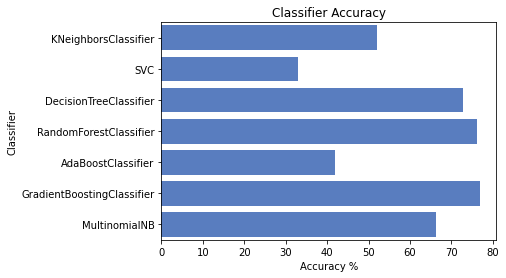

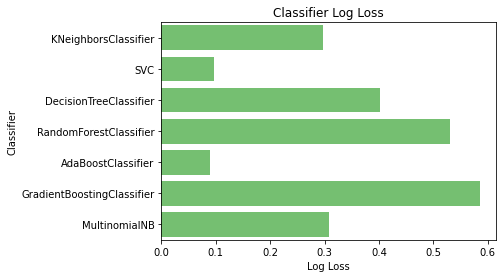

In [106]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [107]:
classifier_RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False)

In [108]:
model_pipe_RF = Pipeline( [ ('vectorizer', tfvectorizer), 
                         ('classifier', classifier_RF) ] )

In [109]:
model_pipe_RF.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokeniser at 0x000002730FC07C10>)),
                ('classifier', RandomForestClassifier())])

In [110]:
preds_RF = model_pipe_RF.predict(X_test)

In [111]:
preds_RF[:10]

array(['restaurant', 'fr', 'fr', 'fr', 'images', 'images', 'images', 'fr',
       'de', 'images'], dtype=object)

In [112]:
X_test[:10]

1208     JIM BLOCK DAS HAMBUAGER ORIGINAL Jim Block Re...
1878     GRILL ISTAMBUL SARL FELINDA 77 RUE DE BEZONS ...
1837     C&A Modas SLU C/ Valportillo I N°13 Madrid 28...
1537                             : 2 90,00 EUR       K...
435      CONFECTIUNERY SDN BHD Jalan Sutera Tanjung 8/...
571         SUSHI - MAHKOTA CHERAS MIZU SDN. BHD. (124...
787                                                   a  
2086       JULES 99 BIS RUE ORDENER 75018 PARIS TEL: O...
1674         dm-drogerie markt 4 04109 10.11.2021 17:4...
29       3-1707067 (481500-M) HARDWARE SDN BHD JALAN P...
Name: text, dtype: object

In [113]:
y_test[:10]

1208       restaurant
1878               fr
1837               es
1537    miscellaneous
435            images
571            images
787        restaurant
2086               fr
1674               de
29             images
Name: doc_type, dtype: object

In [114]:
# Accuracy
print("Train Accuracy: ", model_pipe_RF.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_RF.score(X_test, y_test))

Train Accuracy:  0.9471965160587915
Test Accuracy:  0.7565217391304347


Now we'll test the same for Gradient Boost Classifier

In [117]:
classifier_GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, 
                        subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                        min_impurity_decrease=0.0, init=None, 
                        random_state=None, max_features=None, verbose=0, 
                        max_leaf_nodes=None, warm_start=False, 
                        validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, 
                        ccp_alpha=0.0)


In [118]:
model_pipe_GB = Pipeline( [ ('vectorizer', tfvectorizer), 
                         ('classifier', classifier_GB) ] )

In [119]:
model_pipe_GB.fit(X_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokeniser at 0x000002730FC07C10>)),
                ('classifier', GradientBoostingClassifier())])

In [120]:
preds_GB = model_pipe_GB.predict(X_test)

In [121]:
# Accuracy
print("Train Accuracy: ", model_pipe_GB.score(X_train, y_train))

# Accuracy
print("Test Accuracy: ", model_pipe_GB.score(X_test, y_test))

Train Accuracy:  0.9471965160587915
Test Accuracy:  0.7739130434782608


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [123]:
confusion_matrix(y_test,preds_RF)

array([[  8,   0,   0,   0,   0,   0,   4,   0,   0,   0,   2,   0,   0,
          0],
       [  1,   9,   0,   0,   0,   0,   2,   0,   1,   0,   7,   3,   0,
          0],
       [  0,   0,   2,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0, 109,   0,   0,   4,   0,   0,   0,   0,   1,   0,
          0],
       [  0,   0,   0,   0,  18,   0,   3,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   2,   1,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   1,   0,   0, 119,   0,   0,   0,   0,   1,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,
          0],
       [  0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0],
       [  0,   0,   0,   2,   0,   0,   8,   0,   0,  25,   0,   0,   0,
          1],
       [  0,   0,   0,   2,   0,   0,  14,   0,   0,   0,  31,   0,   0,
          6],
       [  0,  10,   0,   1,   0,   0,   8, 

In [124]:
vectorized_df_X=tfvectorizer.fit_transform(X_train)

In [125]:
vectorized_df_X_test=tfvectorizer.transform(X_test)

In [126]:
classifier_RF

RandomForestClassifier()

In [127]:
grid_param = {
    'n_estimators': [50, 75, 100, 120, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
gd_sr = GridSearchCV(estimator=classifier_RF,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1)

In [130]:
gd_sr.fit(vectorized_df_X, y_train)

c:\Users\ouzem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 75, 100, 120, 200]},
             scoring='accuracy')

In [131]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 120}


In [132]:
gd_sr.best_estimator_

RandomForestClassifier(bootstrap=False, n_estimators=120)

In [133]:
best_result = gd_sr.best_score_
print(best_result)

0.7920509512487252


In [134]:
# Accuracy
print("Train Accuracy: ", gd_sr.score(vectorized_df_X, y_train))

# Accuracy
print("Test Accuracy: ", gd_sr.score(vectorized_df_X_test, y_test))

Train Accuracy:  0.9471965160587915
Test Accuracy:  0.7717391304347826


The same for GB

In [135]:
grid_param = {
    'n_estimators': [50, 75, 100, 120, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'subsample': [0.5, 0.8, 1],
}


In [136]:
gd_sr = GridSearchCV(estimator=classifier_GB,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=3,
                     n_jobs=-1)

In [137]:
gd_sr.fit(vectorized_df_X, y_train)

c:\Users\ouzem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [ ]:
best_parameters = gd_sr.best_params_
print(best_parameters)

In [ ]:
gd_sr.best_estimator_

In [ ]:
best_result = gd_sr.best_score_
print(best_result)

In [ ]:
# Accuracy
print("Train Accuracy: ", gd_sr.score(vectorized_df_X, y_train))

# Accuracy
print("Test Accuracy: ", gd_sr.score(vectorized_df_X_test, y_test))

###################################################################